In [251]:
# installing basic package to use google drive api
# !pip install pydrive
# !pip install xlrd
# !pip install openpyxl

In [252]:
# import libraries
# import GoogleAuth for google drive authorization
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
# imoprt libriaries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas and scipy.stats for data transformation and analysis
import pandas as pd
import scipy.stats as stats

In [253]:
# initializing a GoogelAuth Object
gauth = GoogleAuth()

In [254]:
# client_secret.json file is verified and automatically handles authentication
gauth.LocalWebserverAuth()

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=1021108227251-2nftkefhl2sljlhc1jmepg5516d4j5lo.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [255]:
# GoogleDrive Instance is created using authenticated GoogleAuth instance
drive = GoogleDrive(gauth)
  
# Initialize GoogleDriveFile instance with file id
file_obj = drive.CreateFile({'id': '1Pyo6enIXzQGoMJSY8SaeRosU-cDsEwGQQ4J-vzJULJo'})
file_obj.GetContentFile('statistics_project_survey.xls',
         mimetype='application/vnd.openxmlformats-officedocument.spreadsheetml.sheet')

# read the file
activities = pd.read_excel('statistics_project_survey.xls')


In [256]:
# drop column timestamp
activities.drop(columns = "Timestamp", inplace = True)
activities.head()

Age  Gender  \
0   39    Male   
1   30    Male   
2   24  Female   
3   39    Male   
4   25  Female   

  Do you use any kind of physical activity tracker?\nLike:\n-  Fitness bands/wristbands (e.g., Fitbit, Garmin, Apple Watch)\n-  smartwatches with activity tracking features\n- or other types of activity physical activity trackers  \
0                                                Yes                                                                                                                                                                                    
1                                                 No                                                                                                                                                                                    
2                                                Yes                                                                                                                                                                                    
3                                                 No                                                                                                                                                                                    
4                                                 No                                                                                                                                                                                    

   On average in a week, how many days you do vigorous physical activities like heavy lifting,  aerobics,  fast bicycling or similar activities?  \
0                                                  0                                                                                               
1                                                  0                                                                                               
2                                                  1                                                                                               
3                                                  0                                                                                               
4                                                  1                                                                                               

  On these days,  how much time did you spend  on average doing vigorous physical activities?  \
0                                           00:00:00                                            
1                                           00:00:00                                            
2                                           01:00:00                                            
3                                           00:00:00                                            
4                                           03:30:00                                            

   On average in a week, how many days you do moderate physical activities like carrying light loads, bicycling at a regular pace, doubles tennis, or similar activities? Do not include walking.  \
0                                                  3                                                                                                                                                
1                                                  2                                                                                                                                                
2                                                  0                                                                                                                                                
3                                                  0                                                                                                                                                
4                                     

In [257]:
# Rename the columns
columns_to_rename = list(activities.columns)
columns_to_put = ["Age", "Gender", "Have_PAT", "VPAs_Week", "VPAs_Day", "MPAs_Week", "MPAs_Day", "LPAs_Week", "LPAs_Day"]
columns_mapping = dict(zip(columns_to_rename, columns_to_put))
activities.rename(columns = columns_mapping, inplace = True)

In [258]:
# Removing unusual value "date" in duration of "MPAs_Day" and "LPAs_Day"
activities['MPAs_Day'] = activities['MPAs_Day'].apply(lambda x: x.strftime('%H:%M:%S'))
activities['LPAs_Day'] = activities['LPAs_Day'].apply(lambda x: x.strftime('%H:%M:%S'))
activities.head()

Age  Gender Have_PAT  VPAs_Week  VPAs_Day  MPAs_Week  MPAs_Day  LPAs_Week  \
0   39    Male      Yes          0  00:00:00          3  04:00:00          6   
1   30    Male       No          0  00:00:00          2  02:00:00          7   
2   24  Female      Yes          1  01:00:00          0  00:00:00          7   
3   39    Male       No          0  00:00:00          0  00:00:00          3   
4   25  Female       No          1  03:30:00          2  02:00:00          5   

   LPAs_Day  
0  20:00:00  
1  04:30:00  
2  01:00:00  
3  02:00:00  
4  01:00:00

In [259]:
# some data expolration
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        39 non-null     int64 
 1   Gender     39 non-null     object
 2   Have_PAT   39 non-null     object
 3   VPAs_Week  39 non-null     int64 
 4   VPAs_Day   39 non-null     object
 5   MPAs_Week  39 non-null     int64 
 6   MPAs_Day   39 non-null     object
 7   LPAs_Week  39 non-null     int64 
 8   LPAs_Day   39 non-null     object
dtypes: int64(4), object(5)
memory usage: 2.9+ KB


In [260]:
# calculate total minutes of physical activities in minutes

activities["VPAs_min"]  = activities['VPAs_Day'].apply(lambda x: int(x.hour) * 60 + int(x.minute))* activities['VPAs_Week']
activities["MPAs_min"]  = activities['MPAs_Day'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])) * activities['MPAs_Week']
activities["LPAs_min"]  = activities['LPAs_Day'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1])) * activities['LPAs_Week']

In [261]:
activities.drop(columns = ["VPAs_Day", "MPAs_Day", "LPAs_Day"], inplace = True)
activities

Age             Gender Have_PAT  VPAs_Week  MPAs_Week  LPAs_Week  \
0    39               Male      Yes          0          3          6   
1    30               Male       No          0          2          7   
2    24             Female      Yes          1          0          7   
3    39               Male       No          0          0          3   
4    25             Female       No          1          2          5   
5    41               Male      Yes          2          4          7   
6    22               Male       No          0          0          0   
7    37               Male      Yes          6          1          5   
8    39               Male      Yes          1          2          4   
9    28               Male       No          0          2          6   
10   20             Female      Yes          3          1          0   
11   21               Male       No          0          0          0   
12   20             Female       No          0          1          4   
13   33               Male      Yes          3          2          7   
14   31               Male       No          0          0          5   
15   32               Male      Yes          2          4          5   
16   19             Female       No          0          0          1   
17   20               Male      Yes          1          3          7   
18   19             Female      Yes          1          3          7   
19   35               Male      Yes          2          2          7   
20   22             Female      Yes          3          5          7   
21   36               Male       No          3          2          3   
22   30               Male       No          1          2          4   
23   26               Male      Yes          2          0          7   
24   30               Male      Yes          3          2          5   
25   21             Female       No          2          2          5   
26   26               Male       No          0          0          7   
27   19               Male      Yes          7          7          7   
28   19               Male      Yes          4          4          7   
29   32               Male      Yes          1          0          5   
30   34               Male       No          3          3          7   
31   33               Male      Yes          5          5          5   
32   25               Male      Yes          5          2          7   
33   31               Male      Yes          0          0          5   
34   30             Female      Yes          1          0          7   
35   29             Female      Yes          2          4          2   
36   28             Female      Yes          3          3          5   
37   30  Prefer not to say      Yes          3          5          7   
38   22             Female       No          2          3          6   

    VPAs_min  MPAs_min  LPAs_min  
0          0       720      7200  
1          0       240      1890  
2         60         0       420  
3          0         0       360  
4        210       240       300  
5        660      1560       630  
6          0         0         0  
7        360        60       100  
8         60       360       600  
9          0        60       180  
10       180        60         0  
11         0         0         0  
12         0        15        80  
13      1350       540      4410  
14         0         0         0  
15        90       480      3000  
16         0         0        60  
17        45       120       210  
18       120       360       420  
19       240       240      2100  
20       135       600      3360  
21      2160       600       360  
22        60       240       960  
23       300         0      6300  
24       180       240      1200  
25        60       180       100  
26         0         0       420  
27      1680       840      1680  
28      1440       960       210  
29        60         0        75  
30       120       120         0  
31 

In [262]:
#Metabolic equivalent of task (MET)
MET_LPA = 3.3
MET_MPA =  4.0
MET_VPA = 8.0
activities["Total_MET_Week"] = activities["VPAs_min"] * MET_VPA + activities["MPAs_min"] * MET_MPA + activities["LPAs_min"] * MET_LPA

In [263]:
activities

Age             Gender Have_PAT  VPAs_Week  MPAs_Week  LPAs_Week  \
0    39               Male      Yes          0          3          6   
1    30               Male       No          0          2          7   
2    24             Female      Yes          1          0          7   
3    39               Male       No          0          0          3   
4    25             Female       No          1          2          5   
5    41               Male      Yes          2          4          7   
6    22               Male       No          0          0          0   
7    37               Male      Yes          6          1          5   
8    39               Male      Yes          1          2          4   
9    28               Male       No          0          2          6   
10   20             Female      Yes          3          1          0   
11   21               Male       No          0          0          0   
12   20             Female       No          0          1          4   
13   33               Male      Yes          3          2          7   
14   31               Male       No          0          0          5   
15   32               Male      Yes          2          4          5   
16   19             Female       No          0          0          1   
17   20               Male      Yes          1          3          7   
18   19             Female      Yes          1          3          7   
19   35               Male      Yes          2          2          7   
20   22             Female      Yes          3          5          7   
21   36               Male       No          3          2          3   
22   30               Male       No          1          2          4   
23   26               Male      Yes          2          0          7   
24   30               Male      Yes          3          2          5   
25   21             Female       No          2          2          5   
26   26               Male       No          0          0          7   
27   19               Male      Yes          7          7          7   
28   19               Male      Yes          4          4          7   
29   32               Male      Yes          1          0          5   
30   34               Male       No          3          3          7   
31   33               Male      Yes          5          5          5   
32   25               Male      Yes          5          2          7   
33   31               Male      Yes          0          0          5   
34   30             Female      Yes          1          0          7   
35   29             Female      Yes          2          4          2   
36   28             Female      Yes          3          3          5   
37   30  Prefer not to say      Yes          3          5          7   
38   22             Female       No          2          3          6   

    VPAs_min  MPAs_min  LPAs_min  Total_MET_Week  
0          0       720      7200         26640.0  
1          0       240      1890          7197.0  
2         60         0       420          1866.0  
3          0         0       360          1188.0  
4        210       240       300          3630.0  
5        660      1560       630         13599.0  
6          0         0         0             0.0  
7        360        60       100          3450.0  
8         60       360       600          3900.0  
9          0        60       180           834.0  
10       180        60         0          1680.0  
11         0         0         0             0.0  
12         0        15        80           324.0  
13      1350       540      4410         27513.0  
14         0         0         0             0.0  
15        90       480      3000         12540.0  
16         0         0        60           198.0  
17        45       120       210          1533.0  
18       120       360       420          3786.0  
19       240       240      2100          9810.0  
20       135       600      3360         14568.0  
2

<Figure size 600x600 with 0 Axes>

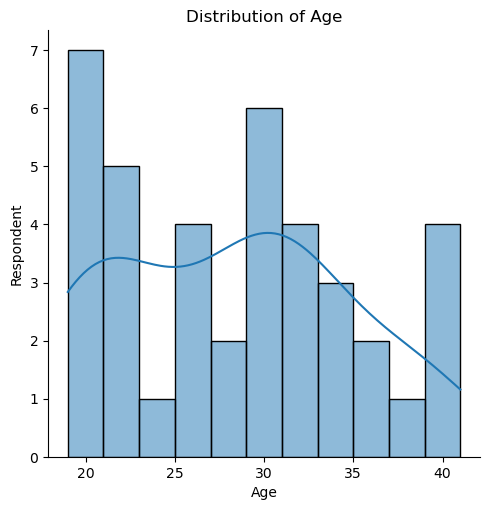

In [300]:
# Distributions of age

plt.figure(figsize=(6, 6))
sns.displot(activities.Age, bins = 20, binwidth = 2, kde=True)
plt.xlabel("Age")
plt.ylabel("Respondent")
plt.title("Distribution of Age")
plt.show()

<Figure size 600x600 with 0 Axes>

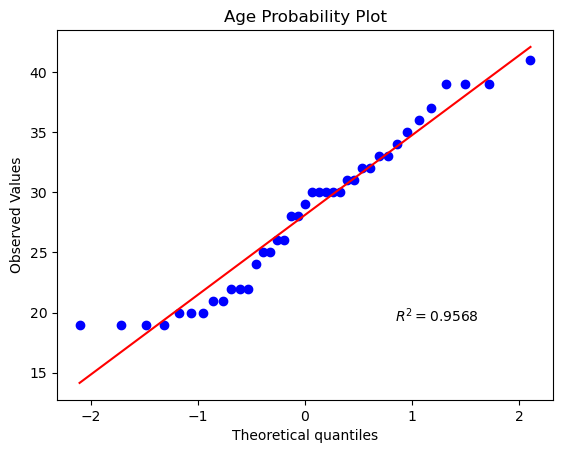

In [301]:
# The above figure doesnt make clear whether the distribution follow normal distributions
# so to check whether the data follow normal distributions, plot the data in probplot and check with alpha level of 5%. 
plt.figure(figsize=(6, 6))
alpha = 0.05
fig = plt.figure()
ax = fig.add_subplot(111)
output = stats.probplot(activities.Age, sparams=(), dist='norm', fit=True, plot=ax, rvalue=True)
ax.set_ylabel('Observed Values')
ax.set_title("Age Probability Plot")
plt.show()

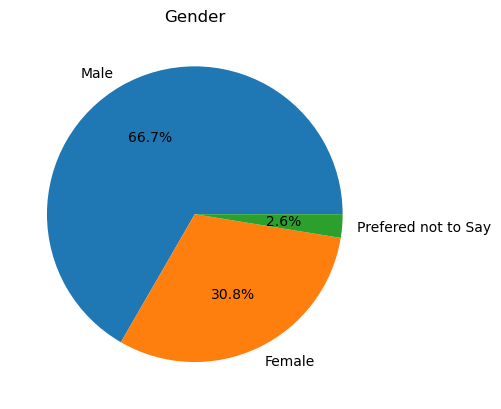

In [315]:
# Distributions of gender
value = activities.Gender.value_counts()
labels = ["Male", "Female", "Prefered not to Say"]
plt.pie(value, labels = labels, autopct = '%1.1f%%')

plt.title("Gender")
plt.show()

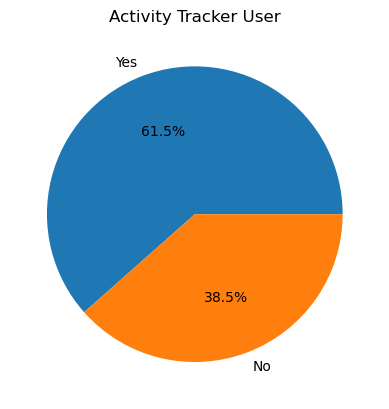

In [318]:
value = activities.Have_PAT.value_counts()
labels = ["Yes", "No"]
plt.pie(value, labels = labels, autopct = '%1.1f%%')

plt.title("Activity Tracker User")
plt.show()


In [80]:
# Very few of them think that a PAT allows them to increase PA levels.
"""The use of physical activity trackers devices and physical activity levels in adolescents and adults
Cuadernos de Psicología del Deporte, vol. 21, no. 1, pp. 258-270, 2021
Universidad de Murcia"""

# study show males tends to be more physically active than females.
# University of Exeter. "Lifelong Gender Difference In Physical Activity Revealed." ScienceDaily. ScienceDaily, 8 January 2009. <www.sciencedaily.com/releases/2009/01/090105190740.htm>.

'The use of physical activity trackers devices and physical activity levels in adolescents and adults\nCuadernos de Psicología del Deporte, vol. 21, no. 1, pp. 258-270, 2021\nUniversidad de Murcia'

In [ ]:
## 1. 
# H0: PAT user tends to be more physically active than non PAT user.
### test on all level of physical activities
#### VPAs_min, MPAs_min, LPAs_min, Total_MET_Week

## 2. 
# H0: there is no difference in physical activity levels between males and females.
### ttest on all level of physical activities
#### VPAs_min, MPAs_min, LPAs_min, Total_MET_Week

## 3. 
# H0: Individuals who engage in vigorous physical activity (VPAs) have higher levels of moderate physical activity (MPAs)
# compared to those who do not engage in VPAs.

P_value is lesss than our significance level, we reject the null hypothesis
0.0014830565096554669


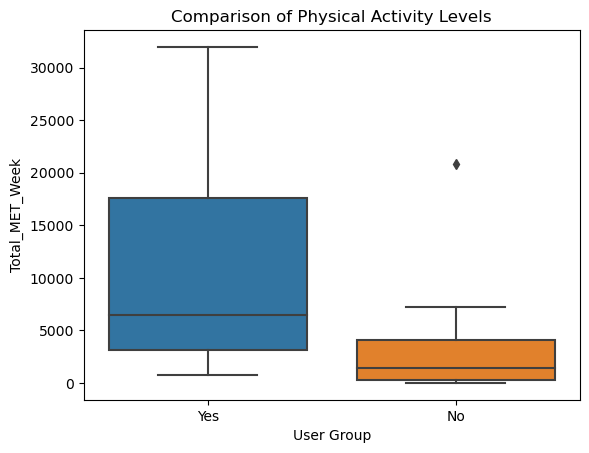

In [78]:
# Steps 1: set hypothesis 
# H0: PAT user tends to be more physically active.
### test on all level of physical activities

#### Total_MET_Week  ->>  p-value: 0.00148
#### VPAs_min   ->>       p-value:  0.160
#### MPAs_min,  ->>       p-value:  0.0197
#### LPAs_min,  ->>       p-value:  0.002

# we want to know whether it is true or not: PAT user tends to have more metabolic equivalent of task (MET).
# H0: pat_user_mu <= non_pat_user_mu
# H1: pat_user_mu > non_pat_user_mu

# Choose significance / confidence level
alpha = 0.05

# Sample
pat_user = activities[activities["Have_PAT"] == "Yes"]
non_pat_user = activities[activities["Have_PAT"] == "No"]

# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["Total_MET_Week"], non_pat_user["Total_MET_Week"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Have_PAT, y=activities.Total_MET_Week, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('Total_MET_Week')
plt.title('Comparison of Physical Activity Levels')

# Show the plot  
plt.show()

We dont have sufficient evidence to reject null hypothesis
0.1604521125955969


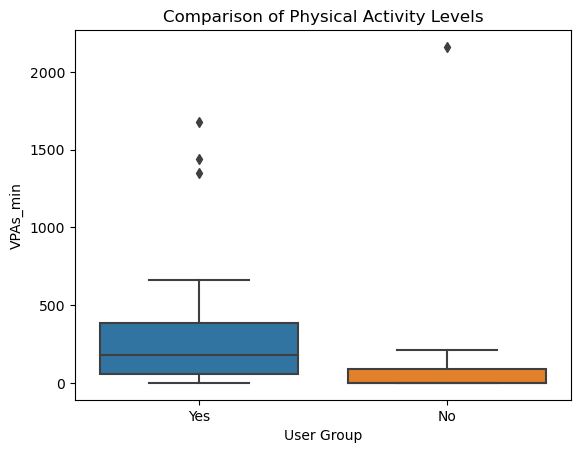

In [305]:
# we want to know whether it is true or not: PAT user tends to be more engage in vigorious physical activity.
# H0: pat_user_mu <= non_pat_user
# H1: pat_user_mu > non_pat_user


# Choose significance / confidence level
alpha = 0.05

# Sample
pat_user = activities[activities["Have_PAT"] == "Yes"]

non_pat_user = activities[activities["Have_PAT"] == "No"]

# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["VPAs_min"], non_pat_user["VPAs_min"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Have_PAT, y=activities.VPAs_min, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('VPAs_min')
plt.title('Comparison of Physical Activity Levels')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.019717053492795445


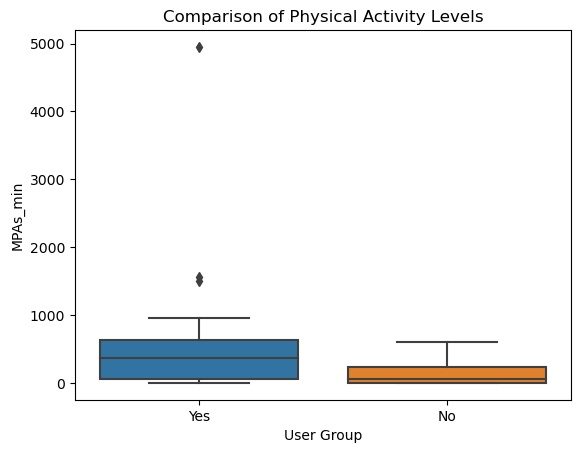

In [306]:
# we want to know whether it is true or not: PAT user tends to be more engage in moderate physical activity.
# H0: pat_user_mu <= non_pat_user
# H1: pat_user_mu > non_pat_user


# Choose significance / confidence level
alpha = 0.05


# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["MPAs_min"], non_pat_user["MPAs_min"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Have_PAT, y=activities.MPAs_min, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('MPAs_min')
plt.title('Comparison of Physical Activity Levels')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.0020800259810858507


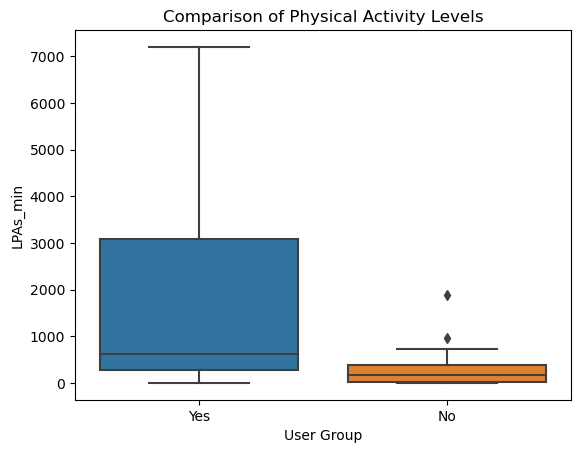

In [307]:
# we want to know whether it is true or not: PAT user tends to more engage in low physical activity.
# H0: pat_user_mu <= non_pat_user
# H1: pat_user_mu > non_pat_user


# Choose significance / confidence level
alpha = 0.05


# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["LPAs_min"], non_pat_user["LPAs_min"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Have_PAT, y=activities.LPAs_min, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('LPAs_min')
plt.title('Comparison of Physical Activity Levels')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.0029661130193109338


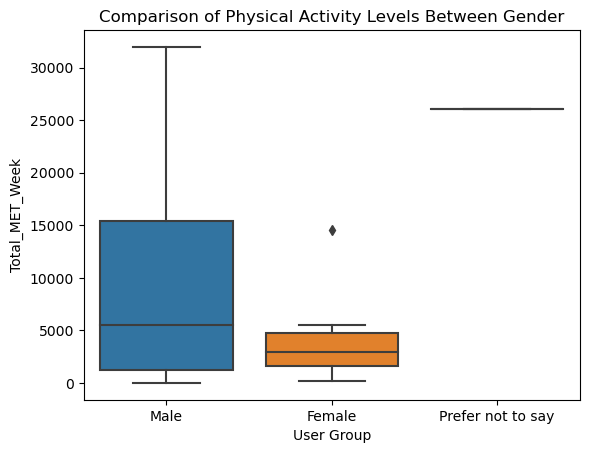

In [309]:
# 2. There is no difference in level of physical activity between males and females.
### ttest on all level of physical activities
#### VPAs_min, MPAs_min, LPAs_min, Total_MET_Week

# men and women have equal Total_MET_Week
# H0: male_mu == female_mu
# H1:  male_mu != female_mu


# Choose significance / confidence level
alpha = 0.05

# Sample
male = activities[activities["Gender"] == "Male"]

female = activities[activities["Gender"] == "Female"]

# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["Total_MET_Week"], non_pat_user["Total_MET_Week"], equal_var = False, alternative = "two-sided")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Gender, y=activities.Total_MET_Week, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('Total_MET_Week')
plt.title('Comparison of Physical Activity Levels Between Gender')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.0007606533929684246


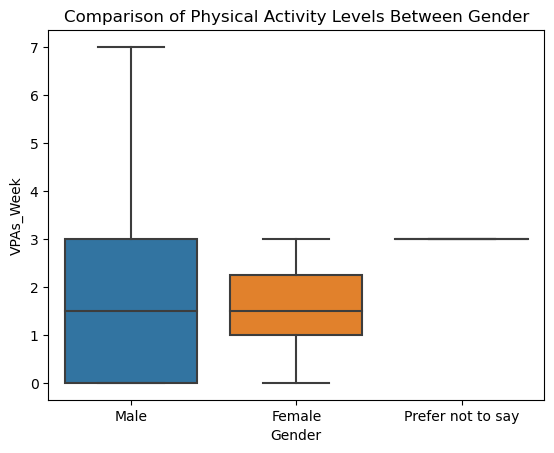

In [310]:
# 2. There is no difference in level of vigorous physical activity between males and females.
# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["VPAs_Week"], non_pat_user["VPAs_Week"], equal_var = False)

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Gender, y=activities.VPAs_Week, data= activities)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('VPAs_Week')
plt.title('Comparison of Physical Activity Levels Between Gender')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.011584933216557776


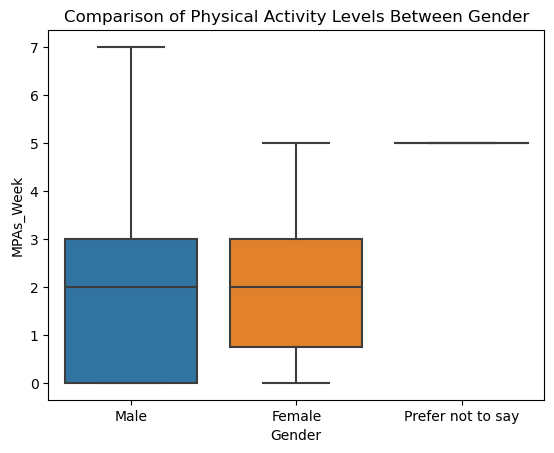

In [248]:
# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["MPAs_Week"], non_pat_user["MPAs_Week"], equal_var = False)

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Gender, y=activities.MPAs_Week, data= activities)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('MPAs_Week')
plt.title('Comparison of Physical Activity Levels Between Gender')

# Show the plot
plt.show()

P_value is lesss than our significance level, we reject the null hypothesis
0.04158217062300618


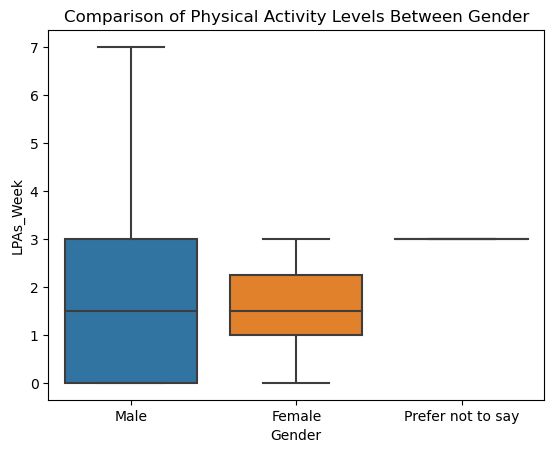

In [249]:
# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["LPAs_Week"], non_pat_user["LPAs_Week"], equal_var = False)

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Gender, y=activities.VPAs_Week, data= activities)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('LPAs_Week')
plt.title('Comparison of Physical Activity Levels Between Gender')

# Show the plot
plt.show()

In [268]:
# H0: Individuals who engage in vigorous physical activity (VPAs) have higher levels of moderate physical activity (MPAs).
# H0: VPA_engaged_mu <= VPA_not_engaged_mu
# H1:  VPA_engaged_mu > VPA_not_engaged_mu

# Choose significance / confidence level
alpha = 0.05

# Sample
VPA_engaged = activities[activities["VPAs_Week"] > 0]
VPA_not_engaged = activities[activities["VPAs_Week"] == 0]

# compute p_value
statistic, p_value = stats.ttest_ind(VPA_engaged["Total_MET_Week"], VPA_not_engaged["Total_MET_Week"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)


P_value is lesss than our significance level, we reject the null hypothesis
0.02180716358445574


In [269]:
# H0: Individuals who engage in vigorous physical activity (VPAs) have higher levels of moderate physical activity (MPAs).
# H0: VPA_engaged_mu <= VPA_not_engaged_mu
# H1:  VPA_engaged_mu > VPA_not_engaged_mu

# Choose significance / confidence level
alpha = 0.05

# Sample
VPA_engaged = activities[activities["VPAs_Week"] > 0]["MPAs_min"]
VPA_not_engaged = activities[activities["VPAs_Week"] == 0]["MPAs_min"]

# compute p_value
statistic, p_value = stats.ttest_ind(VPA_engaged, VPA_not_engaged, equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)


P_value is lesss than our significance level, we reject the null hypothesis
0.011289656499510916


In [270]:
# H0: Individuals who engage in vigorous physical activity (VPAs) have higher levels of lower physical activity (LPAs).
# H0: VPA_engaged_mu <= VPA_not_engaged_mu
# H1:  VPA_engaged_mu > VPA_not_engaged_mu

# Choose significance / confidence level
alpha = 0.05

# Sample
VPA_engaged = activities[activities["VPAs_Week"] > 0]["LPAs_min"]
VPA_not_engaged = activities[activities["VPAs_Week"] == 0]["LPAs_min"]

# compute p_value
statistic, p_value = stats.ttest_ind(VPA_engaged, VPA_not_engaged, equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

We dont have sufficient evidence to reject null hypothesis
0.3031577680286438


In [238]:
activities.columns

Index(['Age', 'Gender', 'Have_PAT', 'VPAs_Week', 'MPAs_Week', 'LPAs_Week',
       'VPAs_min', 'MPAs_min', 'LPAs_min', 'Total_MET_Week'],
      dtype='object')

In [ ]:
## 3. H0: Individuals who engage in vigorous physical activity (VPAs) 
# also have higher levels of moderate physical activity(MPAs)
# Steps 1: set hypothesis 
# H0: PAT user tends to be more physically active.
### test on all level of physical activities

#### Total_MET_Week  ->>  p-value: 0.00148
#### VPAs_min   ->>       p-value:  0.160
#### MPAs_min,  ->>       p-value:  0.0197
#### LPAs_min,  ->>       p-value:  0.002

# we want to know whether it is true or not: PAT user tends to have more metabolic equivalent of task (MET).
# H0: pat_user_mu <= non_pat_user_mu
# H1: pat_user_mu > non_pat_user_mu


# Choose significance / confidence level
alpha = 0.05

# Sample
pat_user = activities[activities["Have_PAT"] == "Yes"]
non_pat_user = activities[activities["Have_PAT"] == "No"]

# compute p_value
statistic, p_value = stats.ttest_ind(pat_user["Total_MET_Week"], non_pat_user["Total_MET_Week"], equal_var = False, alternative = "greater")

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)

# create box plot to visualize
sns.boxplot(x=activities.Have_PAT, y=activities.Total_MET_Week, data= activities)

# Add labels and title
plt.xlabel('User Group')
plt.ylabel('Total_MET_Week')
plt.title('Comparison of Physical Activity Levels')

# Show the plot  
plt.show()

In [332]:
# H0: Gender doesnot influence the use of PAT
# create cross table with gender and user/non user of PAT
contingency_table = pd.crosstab(activities['Gender'], activities['Have_PAT'])

# Use chi2_contingency test to see if the gender is the determinant of the use of PAT
statistic, p_value, df, expected_freq_under_H0 = stats.chi2_contingency(contingency_table)

# Decide
if p_value < alpha:
    print("P_value is lesss than our significance level, we reject the null hypothesis")
    print(p_value)
else:
    print("We dont have sufficient evidence to reject null hypothesis")
    print(p_value)
    
contingency_table

pd.DataFrame(expected_freq_under_H0).round(2)

We dont have sufficient evidence to reject null hypothesis
0.7128090783918549


0      1
0   4.62   7.38
1  10.00  16.00
2   0.38   0.62